In [38]:
import numpy as np
import pyfits as pf
import matplotlib
from matplotlib import pyplot as plt
import lmfit
from lmfit import minimize, Parameters, report_fit, fit_report
from IPython.display import Image
from lmfit.models import GaussianModel

In [2]:
apf_file = pf.open('ucb-amp193_copy.fits')
header = apf_file[0].header
print (header['TOBJECT'])

KIC8462852t


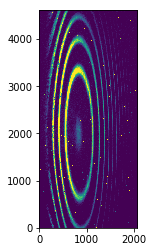

In [3]:
image = apf_file[0].data
plt.imshow(image, vmin = np.median(image), vmax = np.median(image) * 1.2, origin = 'lower')

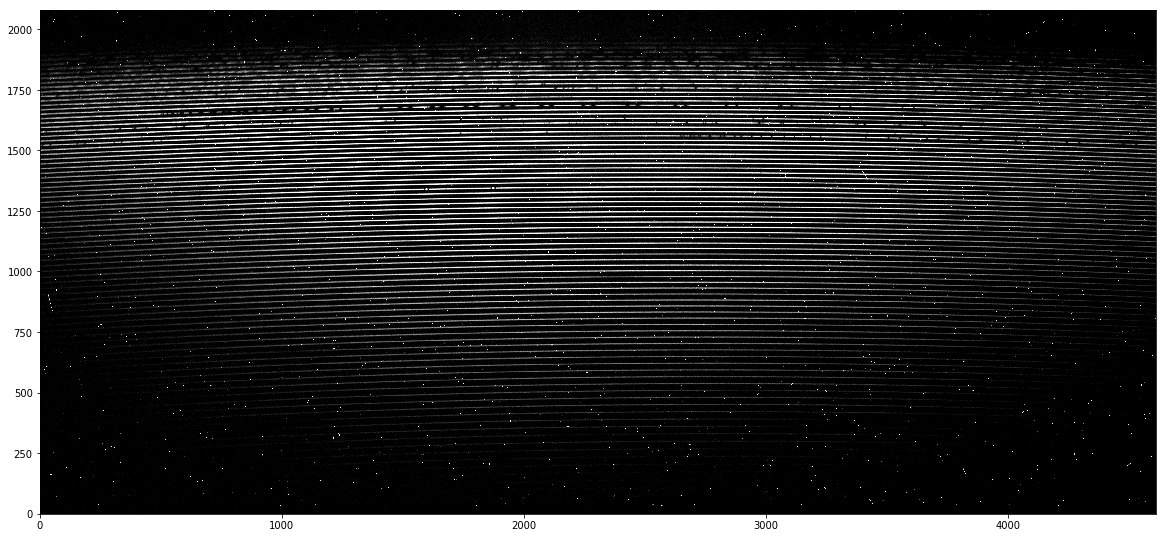

In [4]:
image_rot = np.rot90(image)
image_flip = np.fliplr(image_rot)
plt.figure(figsize=(20,20))
plt.imshow(image_flip, cmap = 'gray', vmin = np.median(image), vmax = np.median(image) * 1.2, origin = 'lower')

In [5]:
bias = np.median(image_flip[-30:])
print (bias)

1074.0


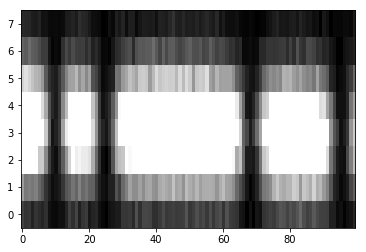

In [6]:
telluric_patch = image_flip[1556:1564, 2800:2900]
plt.imshow(telluric_patch, cmap = 'gray', aspect = 'auto', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')

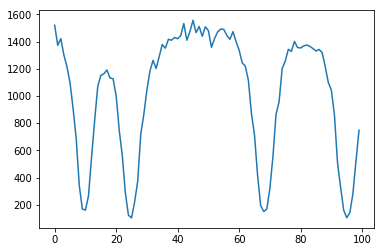

In [7]:
t_1d_no_bias = np.sum(telluric_patch, axis = 0) - bias*8
plt.plot(t_1d_no_bias)

In [10]:
text = open('order_coefficients copy2.txt', "r")
lines = text.read().splitlines()
print (lines[0])

      103.686    0.0725580 -1.27386e-05 -1.01114e-10  2.53449e-14


In [11]:
coeff = np.zeros((79,5))
for i in range(len(lines)):
    a0 = float(lines[i][6:13].strip())
    a1 = float(lines[i][17:26].strip())
    a2 = float(lines[i][27:39].strip())
    a3 = float(lines[i][40:52].strip())
    a4 = float(lines[i][54:].strip())
    oneline = np.array([a0,a1,a2,a3,a4])
    coeff[i] += oneline

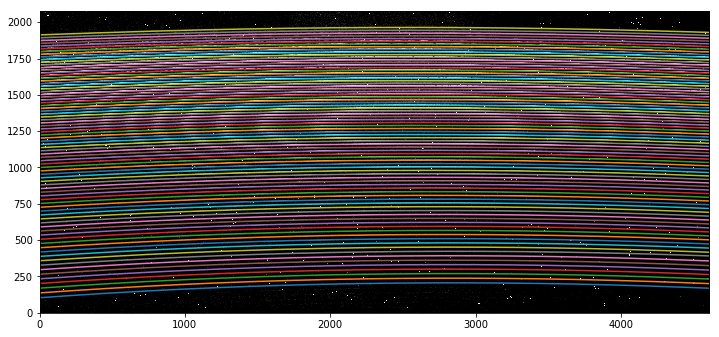

In [28]:
plt.figure(figsize=(12,8))
plt.imshow(image_flip, cmap = 'gray', vmin = np.median(image), vmax = np.median(image) * 1.1, origin = 'lower')
x = np.arange(0,4608)
for i in range(coeff[:,0].size):
    a0 = coeff[i,0]
    a1 = coeff[i,1]
    a2 = coeff[i,2]
    a3 = coeff[i,3]
    a4 = coeff[i,4]
    plt.plot(x, a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4)
    plt.xlim(0,4608)
    plt.ylim(0,2080)



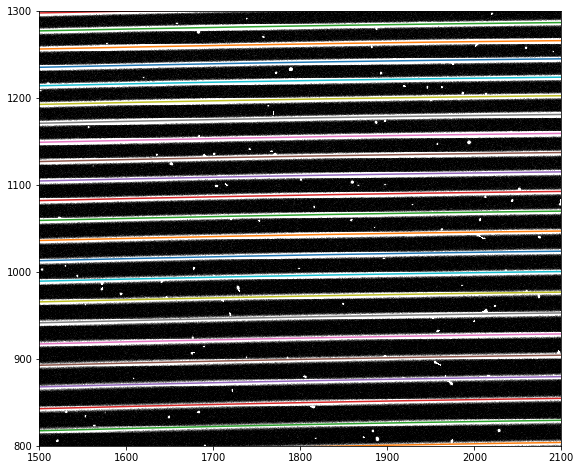

In [27]:
plt.figure(figsize=(12,8))
plt.imshow(image_flip, cmap = 'gray', vmin = np.median(image), vmax = np.median(image) * 1.1, origin = 'lower')
x = np.arange(0,4608)
for i in range(coeff[:,0].size):
    a0 = coeff[i,0]
    a1 = coeff[i,1]
    a2 = coeff[i,2]
    a3 = coeff[i,3]
    a4 = coeff[i,4]
    plt.plot(x, a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4)
    plt.xlim(1500,2100)
    plt.ylim(800,1300)

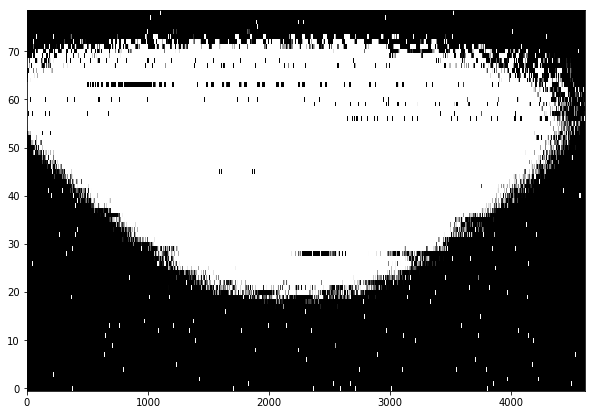

In [30]:
x = np.arange(0, 4608).astype(float)
y_values = np.zeros((79,4608))
poly_reduced_image = np.zeros((79,4608))
for i in range(coeff[:,0].size):
    a0 = coeff[i,0]
    a1 = coeff[i,1]
    a2 = coeff[i,2]
    a3 = coeff[i,3]
    a4 = coeff[i,4]
    for j in range(x.size):
        y = a0 + a1*x[j] + a2*x[j]**2 + a3*x[j]**3 + a4*x[j]**4
        y_values[i,j] = y
        y = int(round(y))
        poly_reduced_image[i,j] = int(np.sum(image_flip[y-3:y+4,j], axis = 0)-7*bias)
plt.figure(figsize=(10,7))
plt.imshow(poly_reduced_image, cmap = "gray", origin = "lower", aspect = "auto", 
           vmin = np.median(poly_reduced_image), vmax = np.median(poly_reduced_image) *1.1)

(0, 1650)

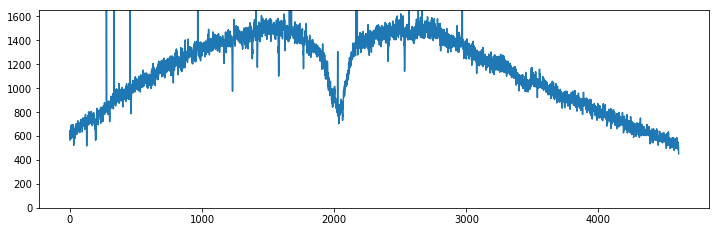

In [37]:
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plt.plot(poly_reduced_image[53])
plt.ylim(0,1650)

In [42]:
wave = pf.open('apf_wave copy.fits')
wave_values = wave[0].data
x = wave_values[53,0:4000]
y = poly_reduced_image[53,0:4000]

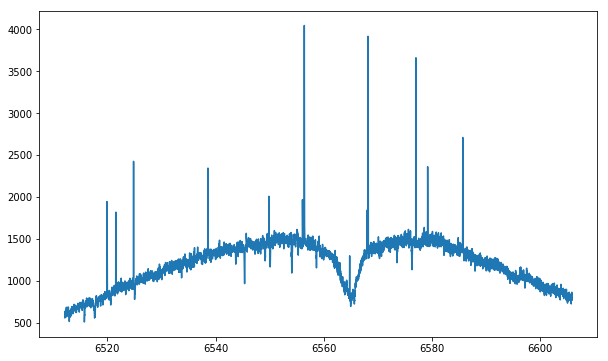

In [43]:
plt.figure(figsize=(10,6))
plt.plot(x,y)